In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite").connect()

In [5]:
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

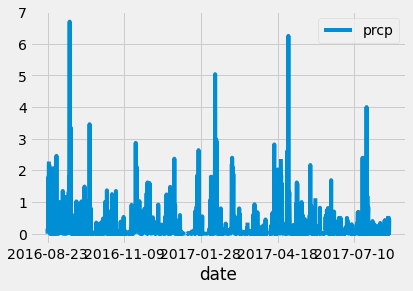

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23', recent_date.date)).order_by(Measurement.date).all()
prcp_df = pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df.plot()



plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
grouped_query = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).all()
grouped_df = pd.DataFrame(grouped_query, columns=['station', 'count'])
grouped_df.sort_values(by=['count'], ascending = False)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_query = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temp_df = pd.DataFrame(temp_query, columns=['station', 'temp'])
max_temp = temp_df['temp'].max()
min_temp = temp_df['temp'].min()
avg_temp = temp_df['temp'].mean()
print('Max temperature = ', max_temp, '\nMin temperature = ', min_temp, '\nAverage temperature = ', avg_temp)

Max temperature =  85.0 
Min temperature =  54.0 
Average temperature =  71.66378066378067


array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

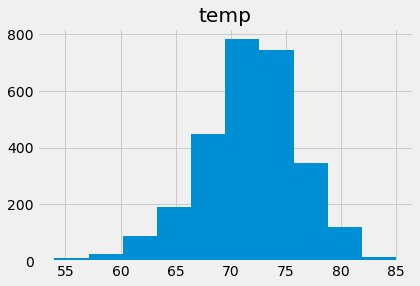

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.hist()

# Close session

In [17]:
# Close Session
session.close()